## Indepedent domain definition

In [1]:
n_elements = 40
p_order = 4
collocation_points = 2;

In [2]:
#Collocation points (with 0 as reference position)
U = Array([0.2113248654, 0.7886751346])

2-element Vector{Float64}:
 0.2113248654
 0.7886751346

In [3]:
xmin = 0
xmax = 1
h = (xmax - xmin)/n_elements
x = []
for i=1:n_elements
    append!(x, ones(4)*h*(i-1) + [xmin, U[1]*h + xmin, U[2]*h + xmin, h])
end
x = union(x);

In [4]:
h

0.025

In [5]:
# This matrix maps a'is to y's using weights (polynomials at each internal node)
H = zeros(n_elements*collocation_points, p_order + 2*n_elements - 2)
A = zeros(n_elements*collocation_points, p_order + 2*n_elements - 2)
B = zeros(n_elements*collocation_points, p_order + 2*n_elements - 2);

In [6]:
l=1
for j = 1:n_elements
    for k = 1:collocation_points
        for i = 1:p_order
            if i == 1
                H[k-1 + l, i + 2*j - 2] = (1 +2*U[k])*(1 - U[k])^2
            
            elseif i == 2
                H[k-1 + l, i + 2*j - 2] = U[k]*(1 - U[k])^2*h
            
            elseif i == 3
                H[k-1 + l, i + 2*j - 2] = U[k]^2*(3 - 2*U[k])
            
            elseif i == 4
                H[k-1 + l, i + 2*j - 2] = U[k]^2*(U[k] - 1)*h
            end

        end
    end
    l = l + 2
end

h1 = zeros(1,size(H)[2])
h2 = zeros(1,size(H)[2])
for i = 1:p_order
    if i == 1
        h1[i] = (1 +2*0)*(1 - 0)^2
        h2[size(H)[2] - 4 + i] = (1 +2*1)*(1 - 1)^2
    elseif i == 2
        h1[i] = 0*(1 - 0)^2*h
        h2[size(H)[2] - 4 + i] = 1*(1 - 1)^2*h
    elseif i == 3
        h1[i] = 0^2*(3 - 2*0)^2
        h2[size(H)[2] - 4 + i] = 1^2*(3 - 2*1)
    elseif i == 4
        h1[i] = 0^2*(0 - 1)*h
        h2[size(H)[2] - 4 + i] = 1^2*(1 - 1)*h
    end
end

H_aug = [h1; H; h2];

In [7]:
l=1
for j = 1:n_elements
    for k = 1:collocation_points
        for i = 1:p_order
            if i == 1
                A[k-1 + l, i + 2*j - 2] = 6*U[k]^2 - 6*U[k]
            
            elseif i == 2
                A[k-1 + l, i + 2*j - 2] = (1 - 4*U[k] + 3*U[k]^2)*h
            
            elseif i == 3
                A[k-1 + l, i + 2*j - 2] = 6*U[k] - 6*U[k]^2
            
            elseif i == 4
                A[k-1 + l, i + 2*j - 2] = (3*U[k]^2 - 2*U[k])*h
            end

        end
    end
    l = l + 2
end

a1 = zeros(1,size(A)[2])
a2 = zeros(1,size(A)[2])
for i = 1:p_order
    if i == 1
        a1[i] = 6*0^2 - 6*0
        a2[size(A)[2] - 4 + i] = 6*1^2 - 6*1
    elseif i == 2
        a1[i] = (1 - 4*0 + 3*0^2)*h
        a2[size(A)[2] - 4 + i] = (1 - 4*1 + 3*1^2)*h
    elseif i == 3
        a1[i] = 6*0 - 6*0^2
        a2[size(A)[2] - 4 + i] = 6*1 - 6*1^2
    elseif i == 4
        a1[i] = (3*0^2 - 2*0)*h
        a2[size(A)[2] - 4 + i] = (3*1^2 - 2*1)*h
    end
end

A_aug = [a1; A; a2];

In [8]:
l=1
for j = 1:n_elements
    for k = 1:collocation_points
        for i = 1:p_order
            if i == 1
                B[k-1 + l, i + 2*j - 2] = 12*U[k]- 6
            
            elseif i == 2
                B[k-1 + l, i + 2*j - 2] = (6*U[k] - 4)*h
            
            elseif i == 3
                B[k-1 + l, i + 2*j - 2] = 6 - 12*U[k]
            
            elseif i == 4
                B[k-1 + l, i + 2*j - 2] = (6*U[k] - 2)*h
            end

        end
    end
    l = l + 2
end

b1 = zeros(1,size(B)[2])
b2 = zeros(1,size(B)[2])

for i = 1:p_order
    if i == 1
        b1[i] = 6*0^2 - 6*0
        b2[size(B)[2] - 4 + i] = 12*1 - 6
    elseif i == 2
        b1[i] = (1 - 4*0 + 3*0^2)*h
        b2[size(B)[2] - 4 + i] = (-4 + 6*1)*h
    elseif i == 3
        b1[i] = 6*0 - 6*0^2
        b2[size(B)[2] - 4 + i] = 6 - 12*1
    elseif i == 4
        b1[i] = (3*0^2 - 2*0)*h
        b2[size(B)[2] - 4 + i] = (6*1 - 2)*h
    end
end

B_aug = [b1; B; b2];

## Defining system of equations

\begin{equation}
y  = [ca, cb, qa, qb] 
\end{equation}

In [9]:
using LinearAlgebra

In [10]:
n_components = 2
n_phases = 2
n_variables =  n_components*n_phases*(p_order + 2*n_elements-2)

328

### Defining residual function

In [11]:
using BlockDiagonals

In [12]:
H_final = Array(BlockDiagonal([H_aug for i = 1:n_components*n_phases]))
A_final = Array(BlockDiagonal([A_aug for i = 1:n_components*n_phases]))
B_final = Array(BlockDiagonal([B_aug for i = 1:n_components*n_phases]));

In [13]:
function isotherms(p, y)
    κa = p[1]
    qa = p[2]
    κb = p[3]
    qb = p[4]
    num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    j = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + j - 1
        upper_index = p_order + 2*n_elements - 3 + j + 1
        #println((lower_index, upper_index))
        num[i] = p[2*i - 1]*y[lower_index:upper_index]
        den += p[2*i - 1]*y[lower_index:upper_index]/p[2*i]
        j = j + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]./(ones(size(den)) + den)
    end
    return iso
end


isotherms (generic function with 1 method)

In [14]:
function col_model(r,yp,y,p,t)
    #Aliasing parameters
    ka_transf = p[5]
    kb_transf = p[6]
    Pe = p[7]
    eps = p[8]
    C_in1 = p[9]
    C_in2 = p[10]
    #H_final = p[11]
    #A_final = p[12]
    #B_final = p[13]
    dy_du = p[14]*y
    dy2_du = p[15]*y
    iso = isotherms(p, y)
    C_in_t = zeros(2)
    
    j = 0
        
    #if t <= 5
        #C_in_t[1] = (1 - exp(-t/1e-4))*C_in1 
        #C_in_t[2] = (1 - exp(-t/1e-4))*C_in2
    #else
        #C_in_t[1] = exp(-(t-5)/1e-4)*C_in1 
        #C_in_t[2] = exp(-(t-5)/1e-4)*C_in2
    #end

    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        r[cl_idx:cu_idx] = yp[cl_idx:cu_idx] + (1-eps)/eps*yp[ql_idx:qu_idx] + dy_du[cl_idx:cu_idx]/h - 1/Pe*dy2_du[cl_idx:cu_idx]/(h^2)

        #Solid phase residual
        r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[i + 4]*(iso[i] - y[ql_idx2:qu_idx2])

        #Boundary node equations
        #r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - C_in_t[i])

        r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - p[8 + i])

        r[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end

end

col_model (generic function with 1 method)

In [15]:
#FUNCTION OF A
function col_model(r,ap,a,p,t)
    #Aliasing parameters
    ka_transf =  p[5]
    kb_transf =  p[6]
    Pe =  p[7]
    eps =  p[8]
    C_in1 =  p[9]
    C_in2 =  p[10]
    H_final = @views p[11]
    A_final = @views p[12]
    B_final = @views p[13]
    y =  H_final*a
    yp =  H_final*ap
    dy_du =  A_final*a
    dy2_du =  B_final*a
    iso =  isotherms(p, y)
    C_in_t = zeros(2)
    
    j = 0
        
    if t <= 0.5
        C_in_t[1] = (1 - exp(-t/1e-3))*C_in1 
        C_in_t[2] = (1 - exp(-t/1e-3))*C_in2
    else
        C_in_t[1] = exp(-(t-0.5)/1e-3)*C_in1
        C_in_t[2] = exp(-(t-0.5)/1e-3)*C_in2
    end

    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        #Checking indexes
        #println((ql_idx2, qu_idx2))

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        r[cl_idx:cu_idx] = yp[cl_idx:cu_idx] + (1-eps)/eps*yp[ql_idx:qu_idx] + dy_du[cl_idx:cu_idx]/h - 1/Pe*dy2_du[cl_idx:cu_idx]/(h^2)

        #Solid phase residual
        r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[i + 4]*(iso[i] - y[ql_idx2:qu_idx2])

        #Boundary node equations
        r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - C_in_t[i])

        #r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - p[8 + i])

        r[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end
return r
end

col_model (generic function with 1 method)

In [16]:
is_differential = ones(Bool, n_variables)
j=0
for i = 1:n_components
    #Internal node equations
    cl_idx = 2 + j
    cu_idx = p_order + 2*n_elements - 3 + j

    ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
    qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

    ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
    qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

    cbl_idx = j + 1
    cbu_idx = j + p_order + 2*n_elements - 2
    #println((cbl_idx, cbu_idx))

    #Liquid phase residual
    is_differential[cl_idx:cu_idx] = ones(Bool, cu_idx-cl_idx + 1)

    #Solid phase residual
    is_differential[ql_idx2:qu_idx2] = ones(Bool, qu_idx2 - ql_idx2 + 1)

    is_differential[cbl_idx] = false

    is_differential[cbu_idx] = false

    j = j + p_order + 2*n_elements - 2
end

Testing residual function

In [17]:
function round_zeros(x)
if abs(x) <= 10^-15
    x = 0
else
    x = x
end
return x
end

round_zeros (generic function with 1 method)

In [14]:
params = [4.1, 125., 5., 125., 200., 200., 500., 0.53, 15., 15., H_final, A_final, B_final, A_final*H_final^-1, B_final*H_final^-1];
#params = [4.1, 125., 5., 125., 200., 200., 500., 0.53, 13., 15., H_final, A_final, B_final, 1, 1];

In [24]:
#using DASKR
using DifferentialEquations
a0 = ones(n_variables)*1e-8
da0 = ones(n_variables)
tspan = (0., 10.)
prob = DAEProblem(col_model, da0, a0, tspan, params,  differential_vars = is_differential);

ArgumentError: ArgumentError: Package DifferentialEquations not found in current path.
- Run `import Pkg; Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.

In [27]:
using Sundials
using DASSL
using DASKR
sol = solve(prob, IDA(), saveat = 0.005);
#reltol = 1e-8, abstol = 1e-8

In [28]:
u_new = mapreduce(permutedims, vcat, sol.u);

In [63]:
y_new = H_final*u_new'
y_new2 = y_new';

In [29]:
n_variables/4

72.0

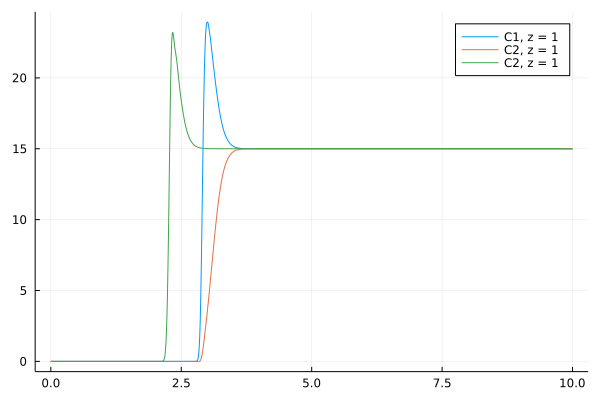

In [30]:
using Plots
plot(sol.t[1:end], u_new[1:end,  72], layout=(1,1), label = "C1, z = 1")
plot!(sol.t[1:end], u_new[1:end,  144], layout=(1,1), label = "C2, z = 1")
plot!(sol.t[1:end], u_new[1:end,  56], layout=(1,1), label = "C2, z = 1")

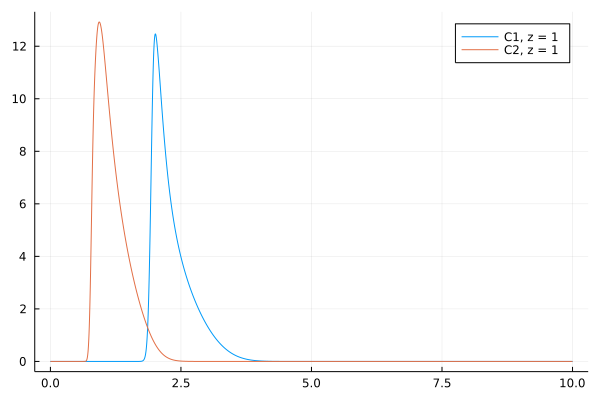

In [65]:
using Plots
plot(sol.t[1:end], y_new2[1:end,  52], layout=(1,1), label = "C1, z = 1")
plot!(sol.t[1:end], y_new2[1:end,  104], layout=(1,1), label = "C2, z = 1")
#plot!(sol.t[1:end], y_new2[1:end,  46], layout=(1,1), label = "C2, z = 1")

## Solving fixed bed for propro-poh

In [14]:
#Qf = 7.88e-3
#d = 0.26 
#L = 4.6 
#a = pi*d^2/4
#epsilon = 0.42
#u = Qf/(a*epsilon)

In [13]:
Qf = 5.0e-2
d = 0.5 
L = 2.0 
a = pi*d^2/4
epsilon = 0.5
u = Qf/(a*epsilon)

0.5092958178940651

Isotherm

In [28]:
function isotherms(par, y)
    κa = par[1]
    qa = par[2]
    κb = par[3]
    qb = par[4]
    num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    j = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + j - 1
        upper_index = p_order + 2*n_elements - 3 + j + 1
        #println((lower_index, upper_index))
        num[i] = par[2*i - 1]*par[2*i]*y[lower_index:upper_index]
        den += par[2*i - 1]*y[lower_index:upper_index]*.5
        j = j + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]./(ones(size(den)) + den)
    end
    return iso
end


isotherms (generic function with 1 method)

In [29]:
function isotherm_freundlich(par, y)
    κa = par[1]
    qa = par[2]
    κb = par[3]
    qb = par[4]
    num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    j = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + j - 1
        upper_index = p_order + 2*n_elements - 3 + j + 1
        #println((lower_index, upper_index))
        num[i] = par[2*i - 1]*abs.(y[lower_index:upper_index]).^(0.6)
        den += par[2*i - 1]*y[lower_index:upper_index]*0.0
        j = j + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]
    end
    return iso
end

isotherm_freundlich (generic function with 1 method)

In [30]:
function isotherm_lin(par, y)
    κa = par[1]
    qa = par[2]
    κb = par[3]
    qb = par[4]
    num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    j = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + j - 1
        upper_index = p_order + 2*n_elements - 3 + j + 1
        #println((lower_index, upper_index))
        num[i] = par[2*i - 1]*abs.(y[lower_index:upper_index])
        den += par[2*i - 1]*y[lower_index:upper_index]*0.0
        j = j + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]
    end
    return iso
end

isotherm_lin (generic function with 1 method)

In [31]:
function isotherm_sips(par, y)
    κa = par[1]
    qa = par[2]
    κb = par[3]
    qb = par[4]
    num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    j = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + j - 1
        upper_index = p_order + 2*n_elements - 3 + j + 1
        #println((lower_index, upper_index))
        num[i] = par[2*i - 1]*par[2*i]*abs.(y[lower_index:upper_index]).^(1.5)
        den += par[2*i - 1]*abs.(y[lower_index:upper_index]).^(1.5).*0.5
        j = j + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]./(ones(size(den)) + den)
    end
    return iso
end

isotherm_sips (generic function with 1 method)

Boolean mask

In [32]:
is_differential = ones(Bool, n_variables)
j=0

for i = 1:n_components
    #Internal node equations
    cl_idx = 2 + j
    cu_idx = p_order + 2*n_elements - 3 + j

    ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
    qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

    ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
    qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

    cbl_idx = j + 1
    cbu_idx = j + p_order + 2*n_elements - 2
    #println((cbl_idx, cbu_idx))

    #Liquid phase residual
    is_differential[cl_idx:cu_idx] = ones(Bool, cu_idx-cl_idx + 1)*true

    #Solid phase residual
    is_differential[ql_idx2:qu_idx2] = ones(Bool, qu_idx2 - ql_idx2 + 1)*true

    is_differential[cbl_idx] = false

    is_differential[cbl_idx + 1] = false

    is_differential[cbu_idx] = false

    j = j + p_order + 2*n_elements - 2
end

Parameters

Initial Condition

In [33]:
kappaa = 0.001*3/245.5E-4
kappab = 0.003*3/245.5E-4

#params = [11.66, 9.13, 5.08, 5.11, kappaa, kappab, 163., 0.42, 11.64, 0.95];

0.36659877800407337

In [34]:
params = [1.8, 55.54, 1.8, 55.54, 0.22, 0.22, 21.095632695978704, 0.5, 5.5, 5.5];

In [35]:
params_lin = [25.0, 55.54, 25.0, 55.54, 0.22, 0.22, 21.095632695978704, 0.5, 2.5, 2.5];

In [36]:
params_freundlich = [25.0, 55.54, 25.0, 55.54, 0.22, 0.22, 21.095632695978704, 0.5, 3.5, 3.5];

In [37]:
params_sips = [1.8, 55.54, 1.8, 55.54, 0.22, 0.22, 21.095632695978704, 0.5, 5.5, 5.5];

In [38]:
y0 = ones(n_variables)
#c0 = [13.23, 0.0] #POH-ProPro
c0 = [5e-3, 5e-3]
#c0 = [0.0, 0.0] #POH-ProPro
j = 0

for i = 1:n_components
    #Internal node equations
    cl_idx = 2 + j
    cu_idx = p_order + 2*n_elements - 3 + j

    ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
    qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

    ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
    qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

    cbl_idx = j + 1
    cbu_idx = j + p_order + 2*n_elements - 2

    #Liquid phase residual
    y0[cl_idx:cu_idx] = ones(cu_idx-cl_idx + 1)*c0[i]

    #Boundary node equations
    y0[cbl_idx] = c0[i]

    y0[cbu_idx] = c0[i]

    j = j + p_order + 2*n_elements - 2
end

iso = isotherms(params_sips, y0)

j=0

for i = 1:n_components

    ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
    qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

    #Solid phase residual
    y0[ql_idx2:qu_idx2] = iso[i]

    j = j + p_order + 2*n_elements - 2

end

a0 = H_final^-1*y0;

In [40]:
y_dy = A_final*H_final^-1
y_dy2 = B_final*H_final^-1;

In [65]:
function col_model(r,yp,y,p,t)
    #Aliasing parameters
    ka_transf = p[5]
    kb_transf = p[6]
    Pe = p[7]
    eps = p[8]
    dy_du = y_dy*y
    dy2_du = y_dy2*y
    iso = isotherms(p, y)
    j = 0

    #C_in = [p[9] p[10]]
    
    if t < 30
        C_in = [p[9] p[10]]
    elseif (t >= 30) & (t < 58)
        C_in = [8.8 2.53]
    elseif (t >= 58) & (t < 86)
        C_in = [6.230 3.954]
    else
        C_in = [6.230 3.954]
    end

        
    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        r[cl_idx:cu_idx] = yp[cl_idx:cu_idx]*L/u + (1-eps)/eps*yp[ql_idx:qu_idx]*L/u + dy_du[cl_idx:cu_idx]/h - 1/Pe*dy2_du[cl_idx:cu_idx]/(h^2)

        #Solid phase residual
        r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[i + 4]*(iso[i] - y[ql_idx2:qu_idx2])

        #Boundary node equations
        r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - C_in[1, i])

        r[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end
end

col_model (generic function with 1 method)

In [44]:
c_lang = [0.00:0.01:9.5...,];
q_freund = 25.0*c_lang.^(0.6)
q_lang = 1.8*55.54*c_lang./(1 .+ 1.8*c_lang);
q_sips = 1.8*55.54*c_lang.^1.5./(1 .+ 1.8*c_lang.^1.5);
q_lin = 25.0*c_lang;
q_toth = 1.8*55.54*c_lang./(1 .+ (1.8*c_lang).^0.68).^(1/0.68);

In [45]:
using Plots

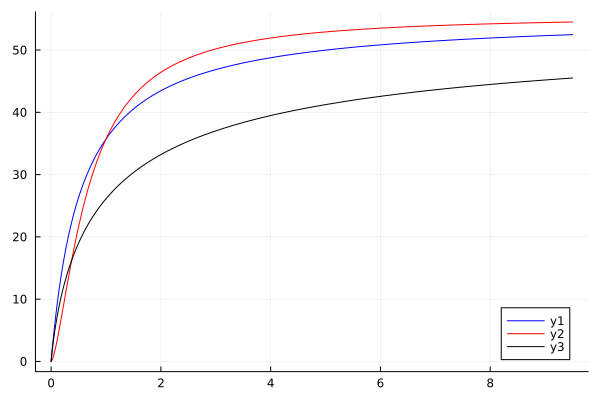

In [46]:
plot(c_lang, q_lang, color = "blue")
plot!(c_lang, q_sips, color = "red")
#plot!(c_lang, q_freund, color = "green")
plot!(c_lang, q_toth, color = "black")



In [47]:
#FUNCTION OF A
function col_model(r,ap,a,p,t)
    #Aliasing parameters
    ka_transf =  p[5]
    kb_transf =  p[6]
    Pe =  p[7]
    epsilon =  p[8]
    C_in1 =  p[9]
    C_in2 =  p[10]
    y =  H_final*a
    yp =  H_final*ap
    dy_du =  A_final*a
    dy2_du =  B_final*a
    #iso =  isotherms(p, y)

    iso = isotherms(p, y)
    
    j = 0
        
    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        #Checking indexes
        #println((ql_idx2, qu_idx2))

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        r[cl_idx:cu_idx] = yp[cl_idx:cu_idx]*(L/u) + ((1-epsilon)/epsilon)*yp[ql_idx:qu_idx]*(L/u) + dy_du[cl_idx:cu_idx]/h - (1/Pe)*dy2_du[cl_idx:cu_idx]/(h^2)

        #Solid phase residual
        r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[i + 4]*(iso[i, 1:end][1] - y[ql_idx2:qu_idx2])

        #r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[i + 4]*(iso[i, 1:end][1] + 0.2789*iso[i, 1:end][1].*exp.(-y[ql_idx2:qu_idx2]./2.0./iso[i, 1:end][1]) - y[ql_idx2:qu_idx2])

        #r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[i + 4]*(iso[i, 1:end][1] - y[ql_idx2:qu_idx2]).^2

        #r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[i + 4]*(iso[i, 1:end][1].^2/2.0./y[ql_idx2:qu_idx2] - y[ql_idx2:qu_idx2]./2.0)

        #Boundary node equations
        r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - p[8 + i])

        r[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end
end

col_model (generic function with 1 method)

In [66]:
function col_model(r,yp,y,p,t)
    #Aliasing parameters
    ka_transf = p[5]
    kb_transf = p[6]
    Pe = p[7]
    eps = p[8]
    dy_du = y_dy*y
    dy2_du = y_dy2*y
    #iso = isotherms(p, y)
    j = 0
    
    #------------------------Inputs------------------------------
    #C_in = [p[9] p[10]]
    
    if t >= 30 
        C_in = [8.8 2.53]
    else
        C_in = [p[9] p[10]]
    end

    #--------------------Isotherm----------------------------
    κa = p[1]
    qa = p[2]
    κb = p[3]
    qb = p[4]
    num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    k = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + k - 1
        upper_index = p_order + 2*n_elements - 3 + k + 1
        num[i] = p[2*i - 1]*p[2*i]*y[lower_index:upper_index]
        den += p[2*i - 1]*y[lower_index:upper_index]
        k = k + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]./(ones(size(den)) + den)
    end
    #----------------------------MB------------------------------

    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + j + 2*(p_order + 2*n_elements - 2)

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        for idx = cl_idx:cu_idx
            r[idx] = yp[idx]*L/u + (1-eps)/eps*yp[idx + 2*(p_order + 2*n_elements - 2)]*L/u + dy_du[idx]/h - 1/Pe*dy2_du[idx]/(h^2)
        end

        #Solid phase residual
        for idx2 = ql_idx2:qu_idx2
            r[idx2] = yp[idx2] - p[i + 4]*(iso[i][idx2 - 2*(p_order + 2*n_elements - 2) - j] - y[idx2])
        end

        #Boundary node equations
        r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - C_in[1, i])

        r[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end
end

col_model (generic function with 1 method)

In [48]:
using DifferentialEquations

In [49]:
params_freundlich = [25.0, 55.54, 25.0, 55.54, 0.22, 0.22, 21.095632695978704, 0.5, 5.5, 5.5];

In [50]:
params_sips = [1.8, 55.54, 1.8, 55.54, 0.22, 0.22, 21.095632695978704, 0.5, 5.5, 5.5];

In [51]:
params = [1.8, 55.54, 1.8, 55.54, 0.22, 0.22, 21.095632695978704, 0.5, 5.5, 5.5];

In [103]:
da0 = ones(n_variables)*5.0
#tspan = (0.0, 400.0)
tspan = (0.0, 130.0)
prob = DAEProblem(col_model, da0, a0, tspan, params_sips, 
differential_vars = is_differential);

In [108]:
#0.75, 9.33
da0 = ones(n_variables)*5.0
tspan = (130., 250.)
prob = DAEProblem(col_model, da0, u_new[end, 1:end], tspan, [1.8, 55.54, 1.8, 55.54, 0.22, 0.22, 21.09, 0.5, 3.5851, 3.5851],
 differential_vars = is_differential);

In [112]:
da0 = ones(n_variables)*20.0
tspan = (250.0, 400.0)
prob = DAEProblem(col_model, da0, u_new[end, 1:end], tspan, [1.8, 55.54, 1.8, 55.54, 0.22, 0.22, 21.09, 0.5, 7.33 , 7.33], 
differential_vars = is_differential);

In [390]:
#inputs  = [130.0 3.5851 3.5851; 250.0 7.33 7.33]
inputs  = [130.0 0.5851 0.5851; 250.0 9.33 9.33]
dosetimes = inputs[:,1]

function affect!(integrator)
    ind_t = findall(t -> t==integrator.t, dosetimes)
    integrator.p[9] = inputs[ind_t[1], 2]
    integrator.p[10] = inputs[ind_t[1], 3]
end
 
cb = PresetTimeCallback(dosetimes, affect!, save_positions = (false, false));

In [230]:
tstop=[180.0]

function condition(u,t,integrator)    
  t in tstop
end

function affect!(integrator)
  integrator.p[9] = 2.5
  integrator.p[10] = 2.5
end

save_positions = (false, false)
cb2 = DiscreteCallback(condition, affect!, save_positions = save_positions)

DiscreteCallback{typeof(condition), typeof(affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(condition, affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[0, 0])

In [113]:
using Sundials
#sol = solve(prob, DFBDF(autodiff = false), abstol = 1e-6, reltol = 1e-6, 
#saveat = 1.0);
sol = solve(prob, IDA(), saveat = 1.0, abstol = 1e-6 , reltol = 1e-6);
    

retcode: Success
Interpolation: 1st order linear
t: 151-element Vector{Float64}:
 250.0
 251.0
 252.0
 253.0
 254.0
 255.0
 256.0
 257.0
 258.0
 259.0
   ⋮
 392.0
 393.0
 394.0
 395.0
 396.0
 397.0
 398.0
 399.0
 400.0
u: 151-element Vector{Vector{Float64}}:
 [3.585100000081004, 1.7077706157359992e-9, 3.585100000130583, 2.2806215181179723e-9, 3.585100000196098, 2.9806736511027316e-9, 3.5851000002809417, 3.833901000943258e-9, 3.5851000003893043, 4.865394828671132e-9  …  48.08814789223411, 2.4228562862795977e-6, 48.088147951650704, 2.301630969651404e-6, 48.0881480054811, 1.9581852940033496e-6, 48.088148046624084, 1.2592565697147449e-6, 48.088148063814955, 5.232511001594531e-12]
 [7.112541070062223, -4.586208832387846, 6.989458169961653, -5.273111155757767, 6.8483521611565115, -6.023493319174247, 6.688022493485521, -6.804635736345128, 6.5082139178877485, -7.5740170072733015  …  48.0881484029401, -1.645276931258823e-5, 48.08814812757376, -6.747756156074003e-6, 48.08814802218156, -2.2867933

In [105]:
test = []

Any[]

In [114]:
u_new = mapreduce(permutedims, vcat, sol.u);

In [115]:
push!(test, u_new[2:end, :])

3-element Vector{Any}:
 [3.9683989044094687 -32.31009414933641 … 0.4954013875125444 -2.1324489520711547e-14; 4.207386717729595 -27.268495020719868 … 0.49540138753738233 -1.8347139516020793e-14; … ; 5.499999999982814 -3.625867142658579e-10 … 50.44458643851412 6.767918027342201e-10; 5.499999999985882 -2.9781993518456543e-10 … 50.44458656231472 5.421872473822802e-10]
 [3.702477683605389 2.4754953472376515 … 50.44458665391191 4.3509939125817423e-10; 3.6546713085775586 1.4672588979005958 … 50.44389512058898 9.131019761338211e-8; … ; 3.5851000000921043 1.942134099315538e-9 … 48.088148176755624 5.034866447460463e-12; 3.585100000081004 1.7077706157359992e-9 … 48.088148063814955 5.232511001594531e-12]
 [7.112541070062223 -4.586208832387846 … 48.08814798565612 4.20706906521436e-12; 7.215440142658889 -2.416067391397636 … 48.09032901183636 6.527658328784261e-7; … ; 7.329999999988944 -2.331656555732311e-10 … 51.62707903838596 -4.2257393733272194e-13; 7.3299999999908865 -1.9220257991135192e-10 … 51.

In [116]:
u_final = mapreduce(permutedims, hcat, test);

In [117]:
y_new = H_final*u_final
y_new2 = y_new';

In [55]:
y_new = H_final*u_new'
y_new2 = y_new';

In [156]:
q_ = y_new[Int(n_variables/4*3), :];
c_ = y_new[Int(n_variables/4), :];
q_star = 1.8*55.54.*c_.^1.5./(1. .+ 1.8.*c_.^1.5);

#dqdt = 0.22*(q_star + 0.2789*q_star.*exp.(-q_./2.0./q_star) - q_);

#dqdt = 0.22*(q_star - q_);

dqdt = 0.22(q_star.^2/2.0./q_ - q_./2.0)


53-element Vector{Float64}:
 0.0
 8.137221828046687e-5
 0.00048319422341374247
 0.0012252002500765665
 0.002406662806023816
 0.004174002841483339
 0.006770434263280662
 0.010654571603177454
 0.016763985978172462
 0.027138578151981098
 ⋮
 3.576612931297518e-6
 2.1934697866043963e-6
 1.3406656029246733e-6
 8.18703403169252e-7
 5.026517959549892e-7
 3.101013732731417e-7
 1.9009784864465474e-7
 1.1511103842565262e-7
 6.975532897968151e-8

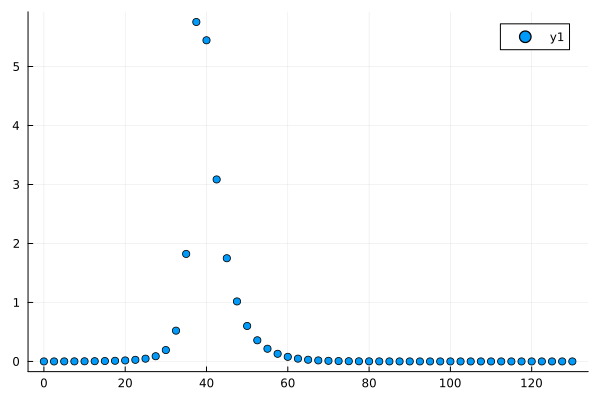

In [158]:
scatter(sol.t[1:end], dqdt)

In [159]:
t_dqdt = hcat(sol.t[1:end], dqdt)

53×2 Matrix{Float64}:
   0.0  0.0
   2.5  8.13722e-5
   5.0  0.000483194
   7.5  0.0012252
  10.0  0.00240666
  12.5  0.004174
  15.0  0.00677043
  17.5  0.0106546
  20.0  0.016764
  22.5  0.0271386
   ⋮    
 110.0  3.57661e-6
 112.5  2.19347e-6
 115.0  1.34067e-6
 117.5  8.18703e-7
 120.0  5.02652e-7
 122.5  3.10101e-7
 125.0  1.90098e-7
 127.5  1.15111e-7
 130.0  6.97553e-8

In [160]:
writedlm("test_data/true_dqdt_improved_quad_sips_25min.csv", t_dqdt, ',')


In [ ]:
iso[i, 1:end][1] + 0.2789*iso[i, 1:end][1].*exp.(-y[ql_idx2:qu_idx2]./2.0./iso[i, 1:end][1]) - y[ql_idx2:qu_idx2]

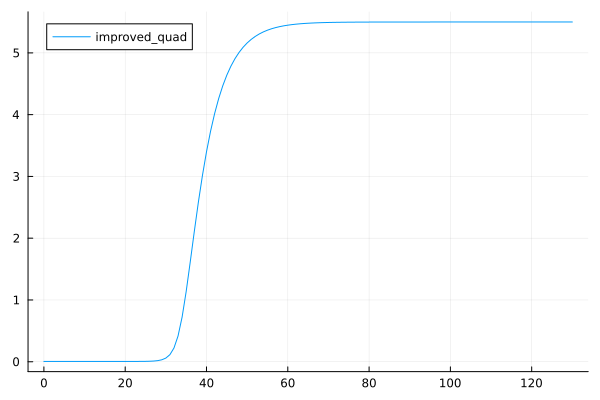

In [56]:
using Plots
plot(sol.t[1:end], y_new2[1:end, Int(n_variables/4)], label = "improved_quad")
#plot!(sol.t[1:end], y_new2[1:end, 42], layout=(1,1), label = "kldf")
#plot!(sol.t[1:end], y_new2[1:end, 42], layout=(1,1), label = "exp")

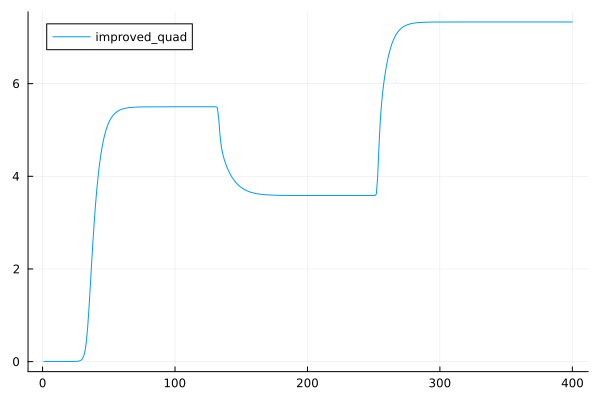

In [118]:
plot(y_new2[1:end, Int(n_variables/4)], label = "improved_quad")

In [417]:
#using Pkg
#Pkg.add("Distributions")

In [119]:
using Distributions

In [120]:
samples = [rand(Truncated(Normal(i, 0.05), 0.0, 15)) for i in y_new2[1:end, Int(n_variables/4)]];

In [121]:
test_t = [collect(1.0:1.0:130.0); collect(131.0:1.0:250.0); collect(251.0:1.0:400.0)];

In [122]:
dataset = hcat(test_t, samples);

In [60]:
dataset = hcat(sol.t, samples);

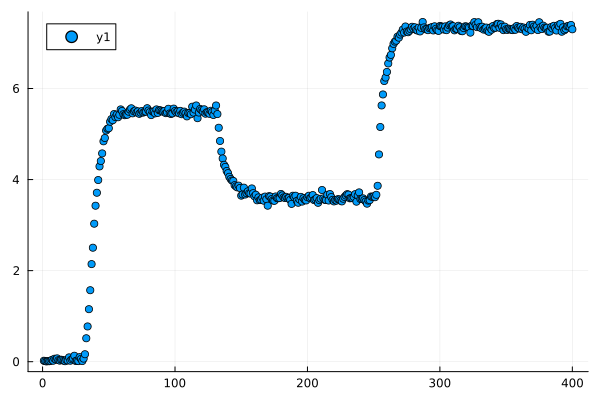

In [123]:
scatter(dataset[:, 1], dataset[:, 2])

In [85]:
using DelimitedFiles

In [63]:
writedlm("train_data/traindata_kldf_lang_1min.csv", dataset, ",")

In [181]:
dataset_test = hcat(sol.t, y_new2[1:end, Int(n_variables/4)]);

In [422]:
writedlm("traindata_improved_kldf_freundlich.csv", dataset_test, ",")

In [124]:
using DelimitedFiles

In [125]:
writedlm("test_data/testdata_kldf_lang_1min.csv", dataset, ",")

## ODE MASS MATRIX

### with original coefficients

Building mass matrix

In [139]:
MM = Diagonal(zeros(n_variables, n_variables))
j=0
for i = 1:n_components
    #Internal node equations
    cl_idx = 2 + j
    cu_idx = p_order + 2*n_elements - 3 + j

    ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
    qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

    ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
    qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

    cbl_idx = j + 1
    cbu_idx = j + p_order + 2*n_elements - 2
    #println((cbl_idx, cbu_idx))

    #Liquid phase residual
    MM[cl_idx:cu_idx, cl_idx:cu_idx] = Diagonal(ones(cu_idx - cl_idx + 1))
    #Solid phase residual
    MM[ql_idx2:qu_idx2, ql_idx2:qu_idx2] = Diagonal(ones(qu_idx2 - ql_idx2 + 1))

    j = j + p_order + 2*n_elements - 2
end

Building model

In [15]:
Qf = 7.88e-3
d = 0.26 
L = 1.15 
a = pi*d^2/4
epsilon = 0.42
u = Qf/(a*epsilon)

0.35337868457710203

In [152]:
function isotherms(par, y)
    κa = par[1]
    qa = par[2]
    κb = par[3]
    qb = par[4]
    num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
    j = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + j - 1
        upper_index = p_order + 2*n_elements - 3 + j + 1
        #println((lower_index, upper_index))
        num[i] = par[2*i - 1]*par[2*i]*y[lower_index:upper_index]
        den += par[2*i - 1]*y[lower_index:upper_index]*0.5
        j = j + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]./(ones(size(den)) + den)
        #iso[i] = num[i]./(ones(size(den)) + den)
    end
    return iso
end

isotherms (generic function with 1 method)

Initial Condition

In [17]:
kappaa = 0.001*3/245.5E-4
kappab = 0.003*3/245.5E-4
params = [11.66, 9.13, 5.08, 5.11, kappaa, kappab, 163., 0.42, 11.64, 0.95];

In [199]:
y0 = ones(n_variables)
#c0 = [13.230000, 0.00000] #POH-ProPro
c0 = [0.00, 0.00] #POH-ProPro
j = 0

for i = 1:n_components
    #Internal node equations
    cl_idx = 2 + j
    cu_idx = p_order + 2*n_elements - 3 + j

    ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
    qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

    ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
    qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

    cbl_idx = j + 1
    cbu_idx = j + p_order + 2*n_elements - 2

    #Liquid phase residual
    y0[cl_idx:cu_idx] = ones(cu_idx-cl_idx + 1)*c0[i]

    #Boundary node equations
    y0[cbl_idx] = c0[i]

    y0[cbu_idx] = c0[i]

    j = j + p_order + 2*n_elements - 2
end

iso = isotherms(params, y0)

j=0

for i = 1:n_components

    ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
    qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

    #Solid phase residual
    y0[ql_idx2:qu_idx2] = Float64.(iso[i])/2.0

    j = j + p_order + 2*n_elements - 2

end

a0 = H_final^-1*y0;

In [207]:
#A
function round_zeros(x)
    if abs(x) <= 1e-50
        0.0
        else
        x   
    end
        
    end

round_zeros (generic function with 1 method)

In [208]:
y_dy = round_zeros.(A_final*H_final^-1);
y_dy2 = round_zeros.(B_final*H_final^-1);

In [42]:
b = replace!(round_zeros, a);

In [23]:
#const dy_du = zeros(size(y_dy*y0));
#const dy2_du = zeros(size(y_dy2*y0));

In [209]:
function col_model_MM(yp,y,p,t)
    #Aliasing parameters
    ka_transf = p[5]
    kb_transf = p[6]
    Pe = p[7]
    eps = p[8]
    dy_du = y_dy*y
    #mul!(dy_du, y_dy, y)
    dy2_du = y_dy2*y
    #mul!(dy2_du, y_dy2, y)
    iso = isotherms(p, y)
    j = 0

    #C_in = [p[9] p[10]]
    
        
    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        yp[cl_idx:cu_idx] = -(1-eps)/eps*p[i + 4]*(iso[i][2:end-1] - y[ql_idx:qu_idx]).*(iso[i][2:end-1] - y[ql_idx:qu_idx]) - dy_du[cl_idx:cu_idx]/h/(L/u) + 1/Pe*dy2_du[cl_idx:cu_idx]/(h^2)/(L/u)
        
        
        #Solid phase residual
        yp[ql_idx2:qu_idx2] =  p[i + 4]*(iso[i] - y[ql_idx2:qu_idx2]).*(iso[i] - y[ql_idx2:qu_idx2])

        #Boundary node equations
        yp[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - p[8 + i])

        yp[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end
    nothing
end

col_model_MM (generic function with 1 method)

In [161]:
#using DifferentialEquations
#using Flux
#using DiffEqFlux
#using OrdinaryDiffEq
#using DiffEqSensitivity
using Plots

In [115]:
#inputs  = [0.0 11.64 0.9538; 30.0 8.8 2.53; 58. 6.23 3.954]
inputs  = [0.0 11.64 0.9538; 30.0 8.8 2.53; 58. 6.23 3.954; 86. 3.6715 5.377; 116. 1.333 6.674; 148. 13.231 0.0718]
#inputs  = [0.0 11.64 0.9538; 30.0 8.8 2.53; 58. 8.8 2.53]
dosetimes = inputs[:,1]

function affect!(integrator)
    ind_t = findall(t -> t==integrator.t, dosetimes)
    integrator.p[9] = inputs[ind_t[1], 2]
    integrator.p[10] = inputs[ind_t[1], 3]
end
 
cb2 = PresetTimeCallback(dosetimes, affect!, save_positions = (false, false));

In [210]:
f = ODEFunction(col_model_MM, mass_matrix = MM);

In [211]:
#tspan = (0.0, 79.78666667)
tspan = (0.0, 100.)
prob_mm = ODEProblem(f, y0, tspan, params);

In [212]:
#time odedata = solve(prob_mm, Rodas4P2(autodiff = false), callback = cb2, saveat = 0.1); #(2nd best so far)
odedata = solve(prob_mm, FBDF(autodiff = false), saveat = .5, tstops = [0.0, 0.02]);
#@time odedata = solve(prob_mm, ROS3P(autodiff = false), abstol = 1e-6, reltol = 1e-6, callback = cb2, saveat = t_exp); #(best so far)
#@time odedata = solve(prob_mm, Rodas5(autodiff = false), callback = cb2, saveat = t_exp, abstol = 1e-10, reltol = 1e-10); #worst

┌ Warning: dt(2.220446049250313e-16) <= dtmin(2.220446049250313e-16) at t=0.008918296627386182. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\Vinic\.julia\packages\SciMLBase\mOGJz\src\integrator_interface.jl:516


retcode: DtLessThanMin
Interpolation: 1st order linear
t: 1-element Vector{Float64}:
 0.0
u: 1-element Vector{Vector{Float64}}:
 [0.7265395985091493, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [137]:
y_MM = mapreduce(permutedims, vcat, odedata.u);

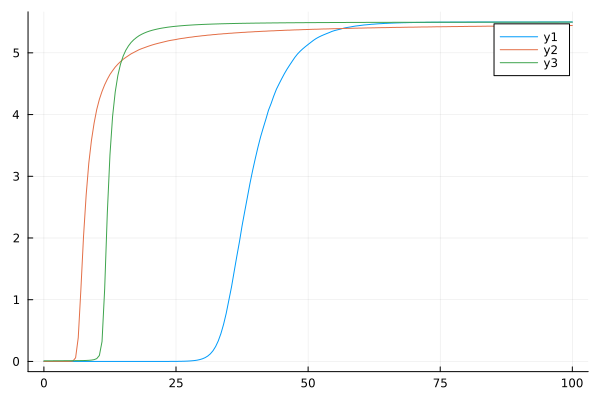

In [138]:
plot(odedata.t, y_MM[:, 42])

In [51]:
size(y_MM)

(201, 168)

In [40]:
u_new = mapreduce(permutedims, vcat, odedata.u);

In [41]:
n_variables/4

42.0

In [46]:
using DelimitedFiles

writedlm("C_phenomenological_t_exp.csv", u_new, ';')

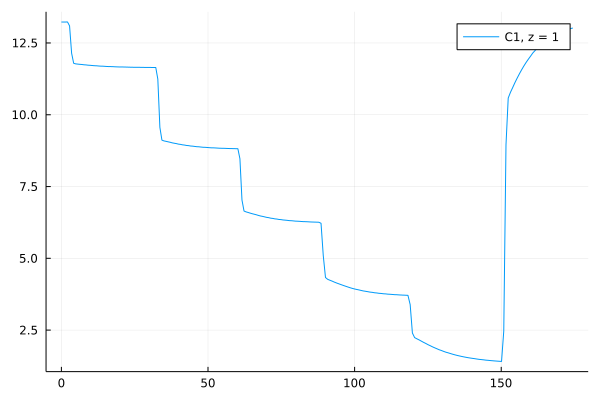

In [47]:
plot(odedata.t[1:end], u_new[1:end,  Int(n_variables/4)], layout=(1,1), label = "C1, z = 1")
#plot!(odedata.t[1:end], u_new[1:end,  Int(n_variables/4)- 33], layout=(1,1), label = "C1, z = 1")
#scatter!(t_exp[1:115], exp_data[1:115, 1])
#plot!(odedata.t[1:end], u_new[1:end,  18], layout=(1,1), label = "C1, z = 1")

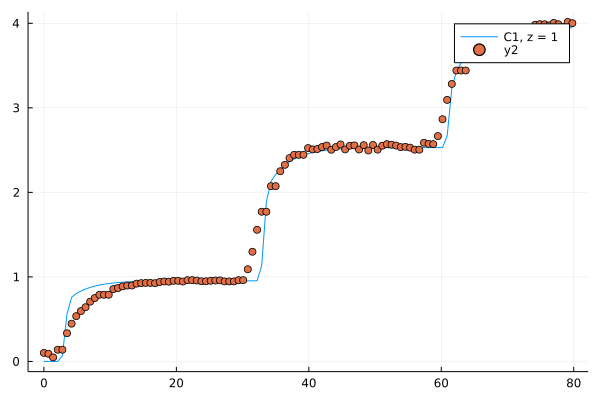

In [58]:
plot(odedata.t[1:end], u_new[1:end,  Int(n_variables/2)], layout=(1,1), label = "C1, z = 1")
scatter!(t_exp[1:size(odedata.t)[1]], exp_data[1:size(odedata.t)[1], 2])

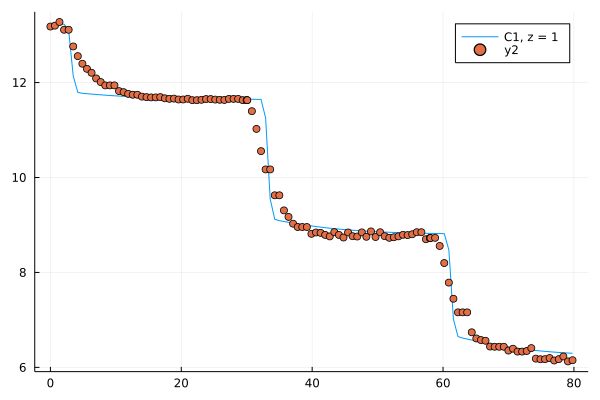

In [42]:
plot(odedata.t[1:end], u_new[1:end,  62], layout=(1,1), label = "C1, z = 1")
scatter!(t_exp2[1:size(odedata.t)[1]], exp_data2[1:size(odedata.t)[1], 1])

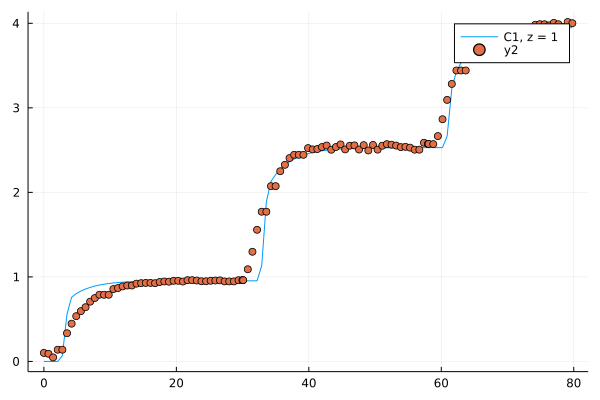

In [43]:
plot(odedata.t[1:end], u_new[1:end,  124], layout=(1,1), label = "C1, z = 1")
scatter!(t_exp2[1:size(odedata.t)[1]], exp_data2[1:size(odedata.t)[1], 2])

## SCIML TRAIN

In [35]:
using MAT

In [36]:
vars = matread("Global_Poh_ProPro.mat");

In [37]:
exp_data = vars["Global_Poh_ProPro"];

In [39]:
new_array_30 = [11.62865599 0.961406771 30.]
new_array_58 = [8.72431  2.57318  58.0];

In [40]:
exp_data2 = vcat(exp_data, new_array_30)
exp_data2 = vcat(exp_data2, new_array_30);

In [41]:
exp_data2 = vcat(exp_data2, new_array_58)
exp_data2 = vcat(exp_data2, new_array_58);

In [42]:
exp_data2 = exp_data2[sortperm(exp_data2[:, 3]), :];

In [38]:
t_exp = exp_data[1:end, end];

In [44]:
t_exp2 = exp_data2[1:end, end];

In [47]:
ann_node = FastChain(FastDense(2, 4, tanh), FastDense(4, 2, sigmoid));
#ann_node = Chain(Dense(2, 4, tanh), Dense(4, 2, sigmoid));

In [48]:
net_params = Float64.(initial_params(ann_node));
#net_params, re = Flux.destructure(ann_node);

In [36]:
#a = [params, net_params];
a = [params, net_params];

Training data

Building neural model

In [49]:
kappaa = 0.001*3/245.5E-4
kappab = 0.003*3/245.5E-4
params = [11.66, 9.13, 5.08, 5.11, kappaa, kappab, 163., 0.42, 11.64, 0.95];

In [50]:
num = [ones(p_order + 2*n_elements-2) for i = 1:n_components]
iso = [ones(p_order + 2*n_elements-2) for i = 1:n_components];

**Testing new model**

In [51]:
function isotherms(y)
    global params
    #κa = a[1][1]
    #qa = a[1][2]
    #κb = a[1][3]
    #qb = a[1][4]

    j = 0
    den = zeros(p_order + 2*n_elements-2)
    for i = 1:n_components
        lower_index = 2 + j - 1
        upper_index = p_order + 2*n_elements - 3 + j + 1
        #println((lower_index, upper_index))
        num[i] = params[2*i - 1]*params[2*i]*y[lower_index:upper_index]
        den = den .+ params[2*i - 1]*y[lower_index:upper_index]
        j = j + p_order + 2*n_elements - 2
    end
    for i = 1:n_components
        iso[i] = num[i]./(ones(size(den)) .+ den)
    end
    return iso
end

isotherms (generic function with 2 methods)

In [52]:
function col_model_node(yp,y,p,t)
    #Aliasing parameters
    global params
    ka_transf, kb_transf, Pe, eps = params[5:8]
    dy_du = y_dy*y
    dy2_du = y_dy2*y
    iso = isotherms(y)
    
    j = 0

    #---------------------Mass Transfer-----------------
    x1 =  y[2 + 0 - 1:p_order + 2*n_elements - 3 + 0 + 1]
    x2 =  y[2 + (p_order + 2*n_elements - 2) - 1:p_order + 2*n_elements - 3 + (p_order + 2*n_elements - 2) + 1]
    K_transf_empirical = ann_node([x1 x2]', p)
    #K_transf_empirical = re(p)([x1 x2]')
    
    #---------------------isotherm----------------------
    
    #element-wise

    #-------------------------------MB-----------------
        
    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        yp[cl_idx:cu_idx] = -(1-eps)/eps*K_transf_empirical[i, 2:end-1].*(iso[i][2:end-1] .- y[ql_idx:qu_idx]) .- dy_du[cl_idx:cu_idx]/h/(L/u) .+ 1/Pe*dy2_du[cl_idx:cu_idx]/(h^2)/(L/u)
        #yp[cl_idx:cu_idx] = -(1-eps)/eps*K_transf_empirical[i, 2:end-1].*(iso[2:end-1,i] - y[ql_idx:qu_idx]) - dy_du[cl_idx:cu_idx]/h/(L/u) + 1/Pe*dy2_du[cl_idx:cu_idx]/(h^2)/(L/u)

        #Solid phase residual
        yp[ql_idx2:qu_idx2] =  K_transf_empirical[i, 1:end].*(iso[i] .- y[ql_idx2:qu_idx2])
        #yp[ql_idx2:qu_idx2] =  K_transf_empirical[i, 1:end].*(iso[:,i] - y[ql_idx2:qu_idx2])
        
        #Boundary node equations
        yp[cbl_idx] = dy_du[cbl_idx]/h .- Pe*(y[cbl_idx] .- params[8 + i])

        yp[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end
    nothing
end


col_model_node (generic function with 1 method)

In [53]:
inputs  = [0.0 11.64 0.9538; 30.0 8.8 2.53; 58. 6.23 3.954]
#inputs  = [0.0 11.64 0.9538; 30.0 8.8 2.53; 58. 8.8 2.53]
dosetimes = inputs[:,1]

function affect!(integrator)
    ind_t = findall(t -> t==integrator.t, dosetimes)
    params[9] = inputs[ind_t[1], 2]
    params[10] = inputs[ind_t[1], 3]
end
 
cb2 = PresetTimeCallback(dosetimes, affect!, save_positions = (false, false));

In [77]:
#Full callback
inputs  = [0.0 11.64 0.9538; 30.0 8.8 2.53; 58. 6.23 3.954; 86. 3.6715 5.377; 116. 1.333 6.674; 148. 13.231 0.0718]
dosetimes = inputs[:,1]

function affect!(integrator)
    ind_t = findall(t -> t==integrator.t, dosetimes)
    params[9] = inputs[ind_t[1], 2]
    params[10] = inputs[ind_t[1], 3]
end
 
cb_full = PresetTimeCallback(dosetimes, affect!, save_positions = (false, false));

In [78]:
f_node = ODEFunction(col_model_node, mass_matrix = MM);
#tspan = (0.0, 79.78666667)
tspan = (0.0, maximum(t_exp))
prob_node =  ODEProblem(f_node, y0, tspan);

In [79]:
function predict(θ)
    prob_ = remake(prob_node, p = θ)
    s_new = Array(solve(prob_, Rodas42(autodiff = false), callback = cb_full, saveat = t_exp, sensealg = ForwardDiffSensitivity()));
    #s_new = Array(concrete_solve(prob_, Rodas42(autodiff = true), callback = cb2, saveat = t_exp))
    [s_new[Int(n_variables/4), 1:end] s_new[Int(n_variables/2), 1:end]]
end

predict (generic function with 1 method)

In [80]:
data_train = exp_data[1:115, 1:2];

In [81]:
# No regularisation right now
function loss_dae(θ)
    pred = predict(θ)
    data = data_train
    loss = sum(abs2, (data .- pred))
    #loss = Flux.mse(pred, data)*100
    return loss, pred
end

loss_dae (generic function with 1 method)

In [67]:
losvt, pred_123 = loss_dae(net_params);
println(losvt)

In [82]:
pred_123 = predict(net_params);

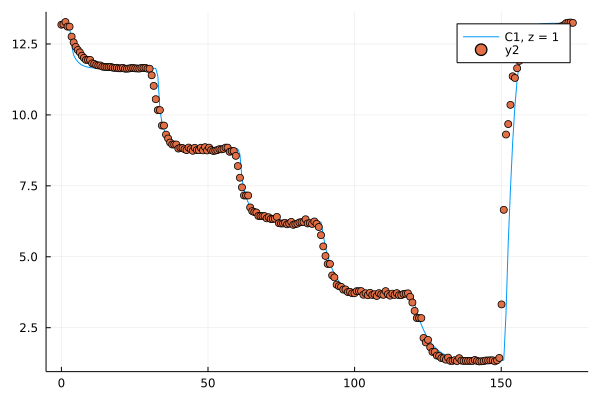

In [89]:
plot(t_exp[1:end], pred_123[1:end,  1], layout=(1,1), label = "C1, z = 1")
#plot(pred[1:end,  2], layout=(1,1), label = "C1, z = 1")
scatter!(t_exp[1:end], exp_data[1:end, 1])

In [94]:
using DelimitedFiles

In [97]:
array = [t_exp[1:end] pred_123[1:end, :] exp_data[1:end, 1:2]];

In [98]:
writedlm("plot_node_kldf.csv",  array, ',')

In [ ]:
CSV.write("gra.csv",  Tables.table(A), writeheader=false)

In [108]:
const losses = []
callback(θ,l,pred) = begin
    push!(losses, l)
    if length(losses)%5==0
        println(losses[end])
    end
    false
end

callback (generic function with 1 method)

In [109]:
#res1_ode = DiffEqFlux.sciml_train(loss_dae, net_params, ADAM(1e-3), cb = callback, maxiters = 20)
res1_ode = DiffEqFlux.sciml_train(loss_dae, net_params, ADAM(0.01), cb = callback, maxiters = 50)


8.811377865647257
8.77984123992276
8.74819526199073
8.709264649012589
8.66133656970756
8.632726551633516
8.609283095011259
8.58367761809089
8.556667239183437
8.550289438905189


┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux C:\Users\win10\.julia\packages\DiffEqFlux\w4Zm0\src\train.jl:73


u: 37-element Vector{Float64}:
  0.09579247009863365
  0.709832748408782
  0.5530252522497225
  0.5446726511177885
 -0.4363287606856738
 -0.30152181550610135
  0.2644782707635408
 -0.2773260435009598
  0.5860441280092208
 -0.8504533592741345
 -0.5068495656267341
  0.5602008029427167
 -0.5824076711494094
  ⋮
  0.5685208263865515
 -0.7912897802838044
  0.4823475947296197
  0.20207508597925777
 -0.017202951057141518
 -0.7893568008171032
 -0.21170847747620258
  0.6242833068437326
  0.4116035897289515
 -0.1741394647084919
 -0.057815552488193596
 -0.022518600858505503

In [ ]:
res2_ode = DiffEqFlux.sciml_train(loss_dae, res1_ode.minimizer, BFGS(initial_stepnorm = 0.01), maxiters = 100)

In [110]:
res1_ode.minimizer

37-element Vector{Float64}:
  0.09579247009863365
  0.709832748408782
  0.5530252522497225
  0.5446726511177885
 -0.4363287606856738
 -0.30152181550610135
  0.2644782707635408
 -0.2773260435009598
  0.5860441280092208
 -0.8504533592741345
 -0.5068495656267341
  0.5602008029427167
 -0.5824076711494094
  ⋮
  0.5685208263865515
 -0.7912897802838044
  0.4823475947296197
  0.20207508597925777
 -0.017202951057141518
 -0.7893568008171032
 -0.21170847747620258
  0.6242833068437326
  0.4116035897289515
 -0.1741394647084919
 -0.057815552488193596
 -0.022518600858505503

In [111]:
losvt, pred_best = loss_dae(res1_ode.minimizer);

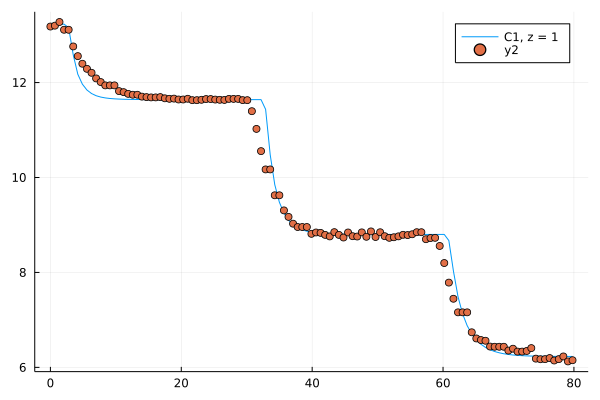

In [112]:
plot(t_exp[1:115], pred_best[1:end,  1], layout=(1,1), label = "C1, z = 1")
#plot(pred[1:end,  2], layout=(1,1), label = "C1, z = 1")
scatter!(t_exp[1:115], exp_data[1:115, 1])

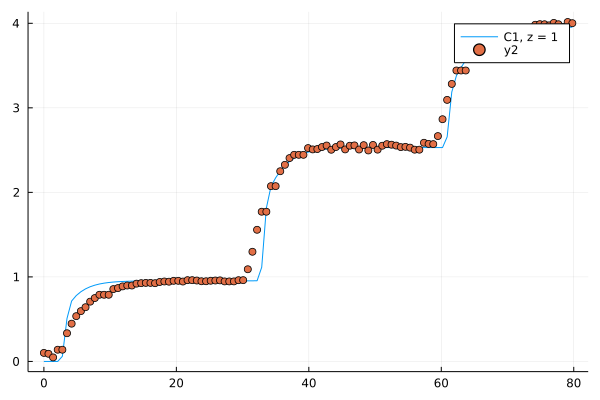

In [113]:
plot(t_exp[1:115], pred_best[1:end,  2], layout=(1,1), label = "C1, z = 1")
#plot(pred[1:end,  2], layout=(1,1), label = "C1, z = 1")
scatter!(t_exp[1:115], exp_data[1:115, 2])

In [ ]:
0.39736483078728063
 -0.1592113848689308
  0.21560572119355947
  0.722678217818886
 -0.9401163981514488
 -0.6629281330184574
 -0.9097664421976953
  0.9851333053895373
  0.06217518999934533
  0.0066677412565069845
  0.026940412393338876
  0.03186378386687173
 -0.6580855855914687
 -0.18914714307844013
 -0.14876703548419692
  0.6777167358173573
 -0.6908693395537264
  0.04325854560823867
  0.5680737302249222
  1.0264323370681707
 -0.03703217755203019
  0.0680667774048652

In [113]:
using ForwardDiff

**Using Flux**

In [49]:
function predict()
    prob_ = remake(prob_node, p = net_params)
    s_new = Array(solve(prob_, Rodas42(autodiff = false), callback = cb2, saveat = t_exp, sensealg = ReverseDiffAdjoint()));
    [s_new[62, 1:end] s_new[124, 1:end]]
end

predict (generic function with 2 methods)

In [50]:
# No regularisation right now
function loss_dae()
    pred = predict()
    data = data_train
    loss = sum(abs2, (data .- pred))
    #loss = Flux.mse(pred, data)*100
    return loss
end

loss_dae (generic function with 1 method)

In [51]:
ps = Flux.params(net_params);

In [52]:
data = Iterators.repeated((), 200);

In [ ]:
Flux.train!(loss_dae, ps, data, ADAM(0.05))

## Neural ODE

In [33]:
using MAT
using DifferentialEquations
using Sundials

In [39]:
using LinearAlgebra
using DiffEqFlux, Flux
using Plots


(process:12528): GLib-GIO-WARNING **: 19:03:32.083: Unexpectedly, UWP app `Evernote.Evernote_10.28.3.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


In [40]:
vars = matread("Global_Poh_ProPro.mat");

In [41]:
exp_data = vars["Global_Poh_ProPro"];

In [42]:
t_exp = exp_data[1:end, end];

In [54]:
ann_node = FastChain(FastDense(2, 4, tanh), FastDense(4, 2));

In [55]:
net_params = Float64.(initial_params(ann_node));

In [56]:
params = [11.66, 9.13, 5.08, 5.11, kappaa, kappab, 163., 0.42, 11.64, 0.95];

In [63]:
function col_model(r,yp,y,p,t)
    #Aliasing parameters
    ka_transf = p[1][5]
    kb_transf = p[1][6]
    Pe = p[1][7]
    eps = p[1][8]
    dy_du = y_dy*y
    dy2_du = y_dy2*y
    iso = isotherms(p[1], y)
    j = 0


    x1 = @view y[2 + 0 - 1:p_order + 2*n_elements - 3 + 0 + 1]
    x2 = @view y[2 + (p_order + 2*n_elements - 2) - 1:p_order + 2*n_elements - 3 + (p_order + 2*n_elements - 2) + 1]
    K_transf_empirical = ann_node([x1 x2]', p[2])


    #C_in = [p[1][9] p[1][10]]
    
    if t < 30
        C_in = [p[1][9] p[1][10]]
    elseif (t >= 30) & (t < 58)
        C_in = [8.8 2.53]
    elseif (t >= 58) & (t < 86)
        C_in = [6.230 3.954]
    else
        C_in = [6.230 3.954]
    end

        
    for i = 1:n_components
        #Internal node equations
        cl_idx = 2 + j
        cu_idx = p_order + 2*n_elements - 3 + j

        ql_idx = 2*(p_order + 2*n_elements - 2) + 2 + j
        qu_idx = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j

        ql_idx2 = 2*(p_order + 2*n_elements - 2) + 2 + j - 1
        qu_idx2 = p_order + 2*n_elements - 3 + 2*(p_order + 2*n_elements - 2) + j + 1

        cbl_idx = j + 1
        cbu_idx = j + p_order + 2*n_elements - 2

        #Liquid phase residual
        r[cl_idx:cu_idx] = yp[cl_idx:cu_idx]*L/u + (1-eps)/eps*yp[ql_idx:qu_idx]*L/u + dy_du[cl_idx:cu_idx]/h - 1/Pe*dy2_du[cl_idx:cu_idx]/(h^2)

        #Solid phase residual
        r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - K_transf_empirical[i, 1:end].*(iso[i] - y[ql_idx2:qu_idx2])
        #r[ql_idx2:qu_idx2] = yp[ql_idx2:qu_idx2] - p[1][4 + i]*(iso[i] - y[ql_idx2:qu_idx2])

        #Boundary node equations
        r[cbl_idx] = dy_du[cbl_idx]/h - Pe*(y[cbl_idx] - C_in[1, i])

        r[cbu_idx] = dy_du[cbu_idx]/h

        j = j + p_order + 2*n_elements - 2
    end
end

col_model (generic function with 1 method)

In [51]:
net_params = 1

1

In [64]:
da0 = ones(n_variables)*1
tspan = (0., 117.)
prob_ndae =  DAEProblem(col_model, da0, y0, tspan, [params, net_params], differential_vars = is_differential);

In [65]:
s = solve(prob_ndae, IDA(), tstops = [30, 58, 86], alg_hints=[:stiff], saveat = 1.);

In [ ]:
u_new = mapreduce(permutedims, vcat, s.u);


(process:22044): GLib-GIO-WARNING **: 00:15:33.477: Unexpectedly, UWP app `Evernote.Evernote_10.28.3.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


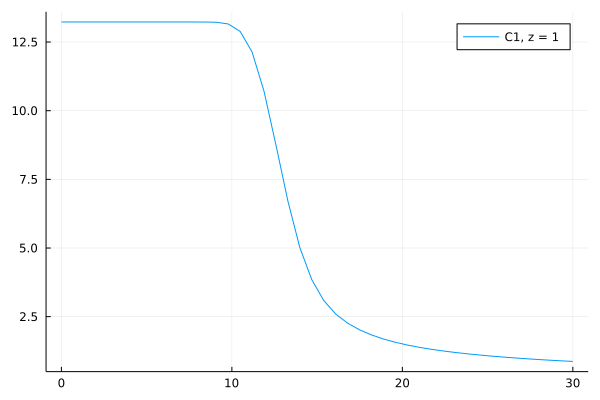

In [ ]:
plot(s.t[1:end], u_new[1:end,  72], layout=(1,1), label = "C1, z = 1")

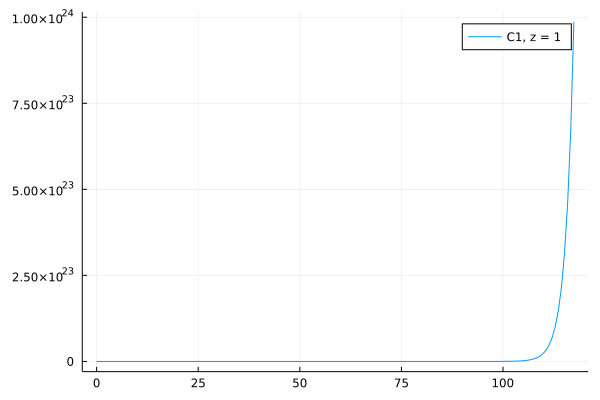

In [ ]:
using Plots
plot(s.t[1:end], u_new[1:end,  144], layout=(1,1), label = "C1, z = 1")

## Train

In [29]:
function predict(θ)
    s_new = solve(prob_ndae, IDA(), p = θ, tstops = [30, 58, 86], alg_hints=[:stiff], saveat = t_exp)
    c = mapreduce(permutedims, vcat, s_new.u);
    ca = c[1:end, 72]
    cb = c[1:end, 144]
    return [ca cb]
end

predict (generic function with 1 method)

In [30]:
# No regularisation right now
function loss_dae(θ)
    pred = predict(θ)
    data = exp_data[1:size(u_new)[1], 1:2]
    loss = sum(abs2, (data .- pred))
    return loss, pred
end

loss_dae (generic function with 1 method)

In [31]:
res1 = DiffEqFlux.sciml_train(loss_dae, net_params, ADAM(0.05), maxiters=100)